# Farm HH pset soln

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from farmhh import *

**Problem Set 1**

Please read the notes on [Farm Household Models](FarmHousehold.ipynb) and answer the questions in this Problem Set. Solutions: 

1.  A farm household’s preferences over consumption (of corn) and leisure are
    summarized by the utility function , where *c* is daily corn consumption and
    *l* is daily leisure in hours. For simplicity assume just one household
    member (call him Joe) with a daily labor endowment of hours. The market wage
    rate is *w* and the price of consumption is p. The household also owns units
    of land. There is no market for land. By applying his own and/or hired labor
    *L* to this fixed size plot the household member can produce units of corn
    which he can sell or consume.
    
    Farm production is given by 

$$
F(\bar T, L) =  \bar T^\alpha \cdot L^{1-\alpha}
$$

Let's assume $\alpha = 1/2$ so and the household has $\bar T_i = 100$ units of land, so that  $F(T,L) = 10 \sqrt L$

**Answer:** No question has been asked yet, but the household's problem is to maximize utility over consumption $c_i$ and leisure $l_i$, given the budget constraint that the value of consumption cannot exceed income from farm profits plus market wages, given by the product of the market wage times labor supply to the market $(\bar L - l_i)$.  We have assumed that there is no land market (so each household farms with available land endowment $\bar T_i$ but that labor markets are competitive.   The farmers optimization problem then becomes nested and separable.  We can think of the household as maximizing utility over consumption and leisure subject to a budget constraint:

$$
\max_{c_i,l_i} U(c_i,l_i)
$$

subject to 

$$
p\cdot c_i \leq \Pi(p,w,q;\bar T_i) + w \cdot (\bar L - l_i)
$$

We can think of the farm as a separable firm as choosing the optimal level of labor input $L_i$ (of own and/or hired labor) to maximize profits:

$$
\Pi(p, w, r;\bar T_i) = \max_{L_i} p \cdot F(\bar T_i, L_i) - w \cdot L_i
$$

and then using this maximized level of profits as part of income.

An equivalent but slightly different way of stating the budget constraint is tha the vlaue of consumption and leisure purchases cannot exceed income generated from farm profits plus the sale of the available labor endowment.  Here the housheold 'purchases' leisure:

$$
p\cdot c_i + w \cdot l_i \leq \Pi(p,w; \bar T_i) - w \cdot L_i$$

2. **The farm profits are given by . Given , $w=1$ and $p=1$ and that the farmer has $\bar T =100$ units of land, what is the farmer’s
    profit maximizing labor input choice $L_i^*$? How much profit does he earn?**

Since the farm household problem is separable we first find maximized farm profits.  The FOC for profit maximization are:

$$
p \cdot F_L = w
$$

or


$$
\alpha \cdot p \cdot \frac{\sqrt{\bar T}}{\sqrt L}  = w
$$

which we can solve 

$$
L_i = \frac{ \alpha^2 p^2}{w^2}  \cdot \bar T_i
$$

So when $\alpha=1/2$, $w=1$, $p=1$ and $\bar T = 100$, the optimal labor input is:  $L_i = \frac{1}{4} \cdot T_i = 25$ units of labor.

In [3]:
ALPHA = 0.5    # land share in production
BETA = 0.7     # consumption share
TBAR = 100     # household land endowment
LBAR = 100     # household labor endowment

W=1            # nominal wage

In [4]:
LD, profit = farm_optimum(TBAR, W, ALPHA)
print(f'Optimal labor input is Li = {LD:4.1f} units of labor; Maximized Profit = {profit: 4.1f}')

Optimal labor input is Li = 25.0 units of labor; Maximized Profit =  25.0


With this information we know household income is:  $I = w \bar L + \Pi(p,w;\bar T_i) = 1 \cdot 100 + 25 = 125$

Since preferences are Cobb-Douglas, we have very simple Marshallian demands for consumption and leisure:

$$
\begin{aligned}
c(p,w, I) &= \beta \cdot \frac{I}{p}   \\
l(p,w, I) &= (1-\beta) \cdot \frac{I}{w}  
\end{aligned}
$$



In [9]:
C, l, utility = HH_optimum(TBAR, LBAR, W, ALPHA, BETA)
print(f'Household consumption is C = {C:4.1f}, leisure l = {l:4.1f}, and maximized utility = {utility: 4.1f}')
print(f'The household labor supply (LBAR- l) = {LBAR - l:4.1f}, and the farm hires out (hires in)  = {LBAR - l -LD: 4.1f} units of labor')

25.0 125.0
Household consumption is C = 87.5, leisure l = 37.5, and maximized utility =  67.9
The household labor supply (LBAR- l) = 62.5, and the farm hires out (hires in)  =  37.5 units of labor


25.0 125.0


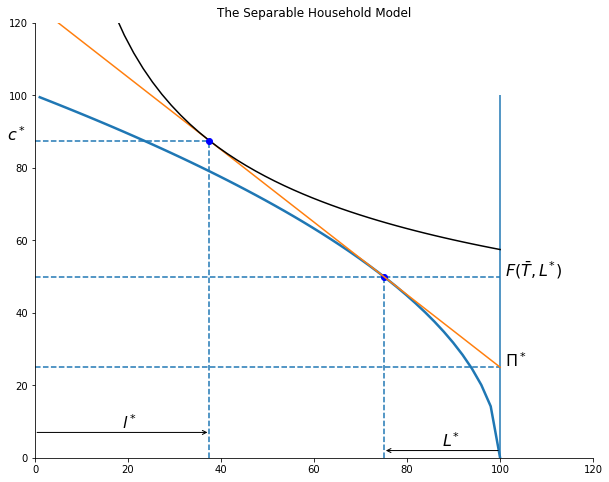

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
plot_production(TBAR,LBAR,W)
plot_farmconsumption(TBAR, LBAR, W)
ax.set_title("The Separable Household Model")
ax.set_xlim(0,LBAR+20)
ax.set_ylim(0,F(TBAR,LBAR)+20)
plt.show()